In [1]:
%matplotlib inline
from dataloader import *
from plotter import *
from neural_net import *
from scripts import *

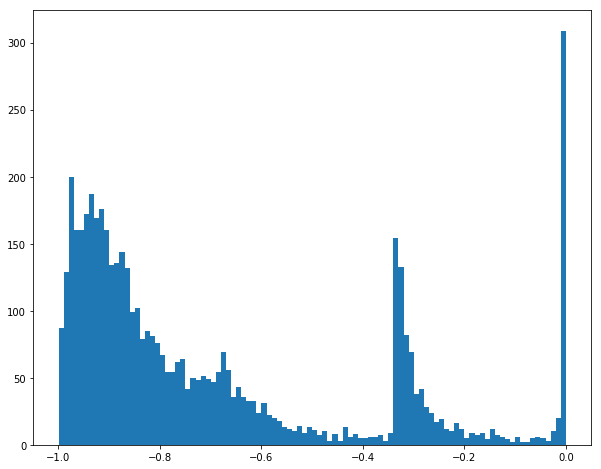

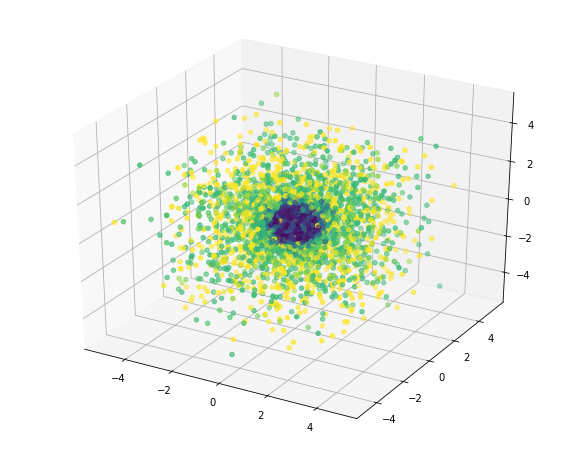

In [8]:
#load dataset
features = load_features("../data/3P_ALIGNED_COORDINATES.txt")
#features = load_features("../data/features.txt")
#features = list(load_features("../data/3P_ALIGNED_COORDINATES.txt")) + list(load_features("../data/features.txt"))

labels = load_labels("../data/3P_T018_POTENTIALS.txt", 1)
#labels = load_labels("../data/labels.txt", 1)
#labels = list(labels) + list(load_labels("../data/labels.txt", 1))

x = []
y = []
z = []
c = []
for i in range(len(features)):
    for j in range(0, len(features[i]), 3):
        x.append(features[i][j+0])
        y.append(features[i][j+1])  
        z.append(features[i][j+2])
        c.append(labels[i])
plot_histogram(labels)
plot_3d(x, y, z, color=np.reshape(c, len(c)))

Step 1, Loss = 4.9752
Step 1000, Loss = 0.0655
Step 2000, Loss = 0.0611
Step 3000, Loss = 0.0569
Step 4000, Loss = 0.0531
Step 5000, Loss = 0.0498
Step 6000, Loss = 0.0470
Step 7000, Loss = 0.0446
Step 8000, Loss = 0.0424
Step 9000, Loss = 0.0406
Step 10000, Loss = 0.0390

 
 TRAINING COMPLETE. LOSS: 0.0390
INFO:tensorflow:Restoring parameters from ../models/TransRot0.18.ckpt
INFO:tensorflow:Restoring parameters from ../models/TransRot0.18.ckpt


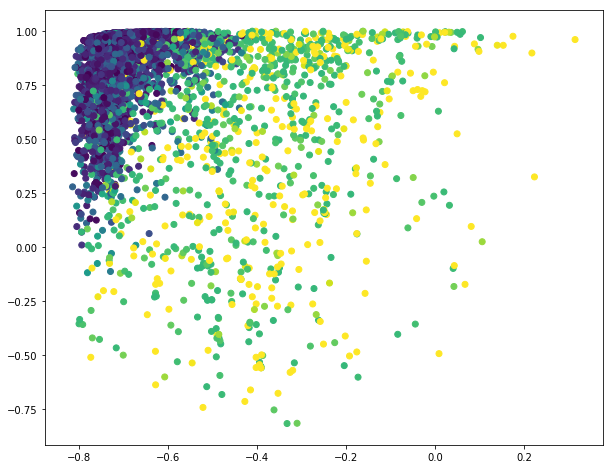

In [84]:
#define Structure of neural net
structure = [9, 11, 6, 2, 1]
activations = ['tanh', 'sigmoid', 'tanh', 'softmax']
model_dir = "../models/TransRot0.18.ckpt"

#initialize neural network and train
nn = NEURAL_NET(3, structure, activations)
nn.learning_rate = 0.1
nn.train(features, labels, test_set_size=1000, num_steps=10000, save=True, restore=False, model_save_dir=model_dir)


reduced_space = nn.get_reduced_space(features, model_dir)
predicted_potentials = nn.get_output_space(features, model_dir)
plot_2d(reduced_space[:, 0], reduced_space[:, 1], color=np.array(labels).flatten())

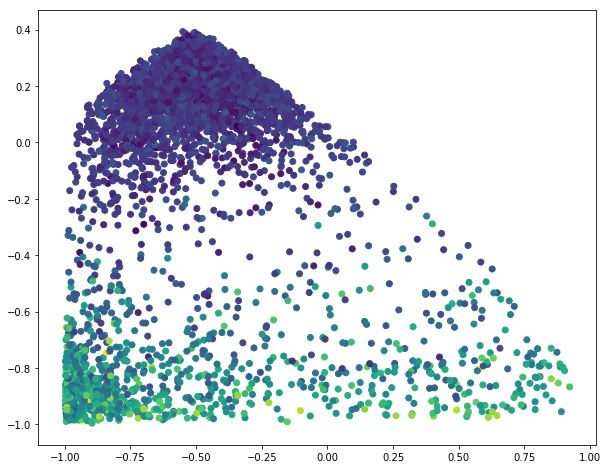

'\n    ixx = 0.0\n    iyy = 0.0\n    izz = 0.0\n    ixy = 0.0\n    iyz = 0.0\n    ixz = 0.0\n    for j in range(len(particles)):\n        ixx += ((particles[j][1]*particles[j][1]) + (particles[j][2]*particles[j][2]))\n        iyy += ((particles[j][0]*particles[j][0]) + (particles[j][2]*particles[j][2]))\n        izz += ((particles[j][0]*particles[j][0]) + (particles[j][1]*particles[j][1]))\n        ixy += (particles[j][0]*particles[j][1])\n        iyz += (particles[j][1]*particles[j][2])\n        ixz += (particles[j][0]*particles[j][2])\n    inertia_tensor = np.array([[ixx, ixy, ixz], [ixy, iyy, iyz], [ixz, iyz, izz]])\n    eigvecs, eigvals = np.linalg.eig(inertia_tensor)\n    print(eigvals)\n    '

In [71]:
RoG = np.zeros(len(features))
for i in range(len(features)):
    particles = np.reshape(features[i], [3, 3])
    z = np.array([0, 0, 1])
    for j in range(len(particles)):
        RoG[i] += np.linalg.norm(particles[j]-z)/3.0
plot_2d(reduced_space[:, 0], reduced_space[:, 1], color=np.array(RoG).flatten())
'''
    ixx = 0.0
    iyy = 0.0
    izz = 0.0
    ixy = 0.0
    iyz = 0.0
    ixz = 0.0
    for j in range(len(particles)):
        ixx += ((particles[j][1]*particles[j][1]) + (particles[j][2]*particles[j][2]))
        iyy += ((particles[j][0]*particles[j][0]) + (particles[j][2]*particles[j][2]))
        izz += ((particles[j][0]*particles[j][0]) + (particles[j][1]*particles[j][1]))
        ixy += (particles[j][0]*particles[j][1])
        iyz += (particles[j][1]*particles[j][2])
        ixz += (particles[j][0]*particles[j][2])
    inertia_tensor = np.array([[ixx, ixy, ixz], [ixy, iyy, iyz], [ixz, iyz, izz]])
    eigvecs, eigvals = np.linalg.eig(inertia_tensor)
    print(eigvals)
    '''